In [1]:
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
import pandas as pd
import serial
import time
import numpy as np

In [ ]:


def read_serial_data(port='COM4', baudrate=230400, duration=10):
    """
    Reads serial data from ESP32 for a defined duration.
    
    Parameters:
        port (str): Serial port name (e.g., 'COM3' on Windows or '/dev/ttyUSB0' on Linux).
        baudrate (int): Baud rate for serial communication.
        duration (int/float): Duration of acquisition in seconds.
    """

    try:
        ser = serial.Serial(port, baudrate, timeout=1)
        print(f"Connected to {port} at {baudrate} baud.")
        print(f"Reading for {duration} seconds...\n")

        start_time = time.time()

        data = []

        while time.time() - start_time < duration:
            if ser.in_waiting:
                line = ser.readline().decode('utf-8', errors='ignore').strip()
                # print(f"[{time.strftime('%H:%M:%S')}] {line}")
                line = line.split(", ")
                try:
                    line = [float(_) for _ in line]
                    if len(line) == 4:
                        data.append(line)
                except:
                    pass
        
        ser.close()
        print("\nAcquisition complete. Serial port closed.")
        return np.array(data)[1:, :]
    

    except serial.SerialException as e:
        print(f"Serial error: {e}")
    except KeyboardInterrupt:
        print("\nInterrupted by user. Closing port...")
        ser.close()

In [135]:
data = read_serial_data(port='COM4', baudrate=230400, duration=2)
data

Connected to COM4 at 230400 baud.
Reading for 2 seconds...


Acquisition complete. Serial port closed.


array([[ 2.0996452e+07, -7.8000000e-02, -7.0000000e-02, -1.1070000e+00],
       [ 2.0997910e+07, -4.1000000e-02,  1.6000000e-02, -2.9300000e-01],
       [ 2.0999360e+07,  8.0000000e-02,  4.0000000e-03,  3.4590000e+00],
       ...,
       [ 2.2989088e+07,  1.3300000e-01, -2.7000000e-02,  3.3790000e+00],
       [ 2.2990516e+07,  4.5000000e-02, -7.0000000e-02, -1.2450000e+00],
       [ 2.2991958e+07, -5.7000000e-02,  2.0000000e-02, -7.0000000e-02]],
      shape=(1391, 4))

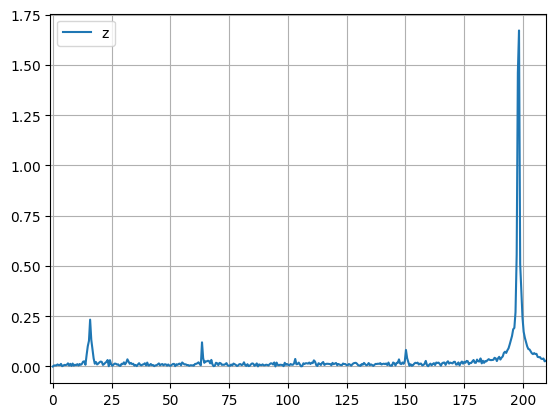

In [ ]:
N = len(data[:,])
dt = (data[2, 0]-data[1, 0])*1e-6

t = data[:, 0]
x = data[:, 1]
y = data[:, 2]
z = data[:, 3]

xf = rfft(x)
yf = rfft(y)
zf = rfft(z - np.mean(z))
tf = rfftfreq(N, dt)

# plt.plot(tf, 2/N * np.abs(xf), label='x')
# plt.plot(tf, 2/N * np.abs(yf), label='y')
plt.plot(tf, 2/N * np.abs(zf), label='z')
plt.xlim(-1, 210)
plt.legend()
plt.grid()

In [ ]:
# Ustvari CSV file, vsakič ko poženeš celico, se doda nova vrstica z frekvenco in amplitudo pospeška 

# freq = tf[np.argmax(2/N *np.abs(zf))]
# amplitude = np.max(2/N *np.abs(zf))
# filename = 'amplitude_2g.csv'

# # Append to CSV with two columns
# with open(filename, 'a') as f:
#     f.write(f"{freq},{amplitude}\n")


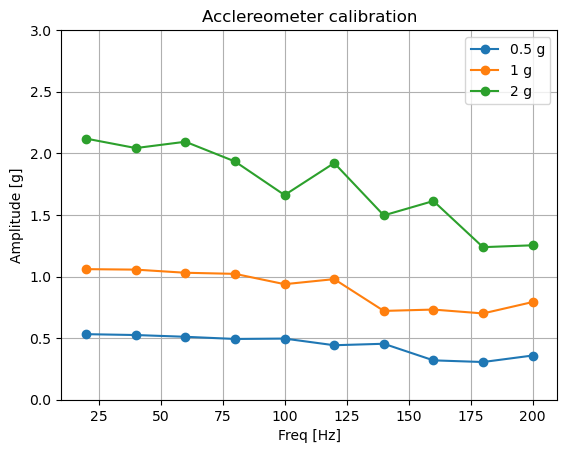

In [9]:
meritve_05g = pd.read_csv('amplitude_05g.csv', header=None)
meritve_1g = pd.read_csv('amplitude_1g.csv', header=None)
meritve_2g = pd.read_csv('amplitude_2g.csv', header=None)

scale_correction = 0.75
amplitude_05g = meritve_05g.iloc[:, 1]*scale_correction
amplitude_1g = meritve_1g.iloc[:, 1]*scale_correction
amplitude_2g = meritve_2g.iloc[:, 1]*scale_correction

frekvence = np.arange(20, 201, 20)
type(amplitude_05g)

plt.plot(frekvence, amplitude_05g, 'o-', label='0.5 g')
plt.plot(frekvence, amplitude_1g, 'o-', label='1 g')
plt.plot(frekvence, amplitude_2g, 'o-', label='2 g')
plt.xlabel('Freq [Hz]')
plt.ylabel('Amplitude [g]')
plt.xlim(10, 210)
plt.ylim(0, 3)
plt.legend()
plt.title('Acclereometer calibration')
plt.grid()
# plt.savefig('testiranje_pospeskomer')
